# 1. 데이터 로드

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어 수
maxlen = 500        # 사용할 텍스트의 길이 (가장 빈번한 max_feature 개의 단어만 사용)
batch_size = 32

# 시퀀스 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f"train sequence: {len(x_train)}")
print(f"test sequence: {len(x_test)}")

# 패딩
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(f"x_train size: {x_train.shape}")
print(f"x_test size: {x_test.shape}")

17464789/17464789 [==============================] - 0s 0us/step
train sequence: 25000
test sequence: 25000
x_train size: (25000, 500)
x_test size: (25000, 500)


# 2. 모델 선언

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 3. 모델 학습 및 평가

In [ ]:
# 학습
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 123ms/step - loss: 0.5839 - acc: 0.6815 - val_loss: 0.4428 - val_acc: 0.8044
Epoch 2/10
157/157 [==============================] - 13s 85ms/step - loss: 0.3575 - acc: 0.8541 - val_loss: 0.3563 - val_acc: 0.8522
Epoch 3/10
157/157 [==============================] - 13s 84ms/step - loss: 0.2858 - acc: 0.8885 - val_loss: 0.2933 - val_acc: 0.8826
Epoch 4/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2378 - acc: 0.9099 - val_loss: 0.3405 - val_acc: 0.8800
Epoch 5/10
157/157 [==============================] - 8s 52ms/step - loss: 0.2103 - acc: 0.9218 - val_loss: 0.3022 - val_acc: 0.8734
Epoch 6/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1889 - acc: 0.9303 - val_loss: 0.3624 - val_acc: 0.8754
Epoch 7/10
157/157 [==============================] - 7s 42ms/step - loss: 0.1716 - acc: 0.9397 - val_loss: 0.3795 - val_acc: 0.8826
Epoch 8/10
157/157 [==============================] - 5s 35ms/st

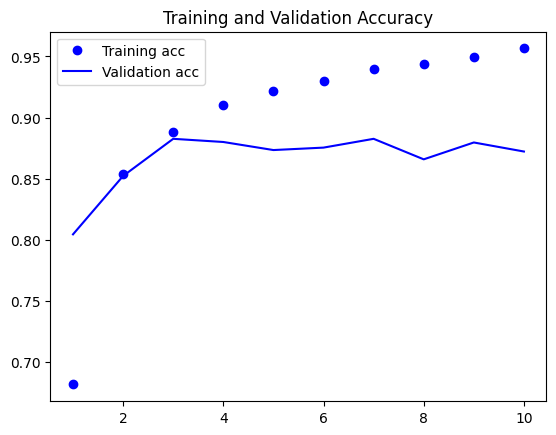

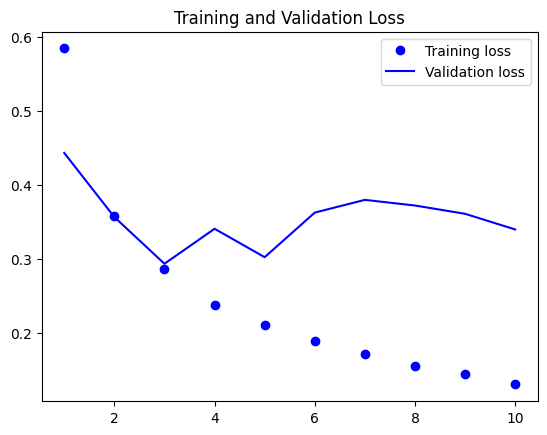

In [ ]:
# 그래프
import matplotlib.pyplot as plt

history = hist.history
acc, val_acc = history['acc'], history['val_acc']
loss, val_loss = history['loss'], history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 평가
performance = model.evaluate(x_test, y_test)
print(f"test accuracy: {performance[1]}")

782/782 [==============================] - 6s 8ms/step - loss: 0.3718 - acc: 0.8630
test accuracy: 0.8629999756813049
